# [자료구조]

## 1. 연결 리스트(Linked List)
데이터와 다음 노드를 가리키는 링크로 이루어진 자료구조

### 1.1 연결 리스트 용어
- <b>노드(Node)</b> : 데이터와 Link를 저장하는 class
- <b>링크(Link)</b> : 다음의 노드를 가르키는 멤버

In [ ]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

### 1.2 연결 리스트의 구현
#### 1.2.1 연결 리스트 초기화
node_A, B, C를 생성하고 A->B, B->C로 링크

In [ ]:
node_A = Node("A")
node_B = Node("B")
node_C = Node("C")
node_D = Node("D")
node_A.next = node_B
node_B.next = node_C
node_C.next = node_D

#### 1.2.2 연결 리스트 출력
node에 node_A를 대입하고 while문을 도는 동안 연결된 모든 node들의 data를 출력한다.

In [ ]:
node = node_A
while node:
    print(node.data)
    node = node.next

#### 1.2.3. 연결 리스트 삽입과 삭제
예를 들어 A, B, D 순서로 연결된 연결 리스트가 있다고 하자.
- <b>삽입</b> : B와 D사이에 C라는 data를 삽입하기 위해서는 C가 D를 가리키도록 하고 B가 C를 가리키도록 하면, A, B, C, D의 연결 리스트가 된다.
- <b>삭제</b> : 여기에 C를 삭제하고 B가 D를 가리키도록 하면, 다시 A, B, D의 연결 리스트가 된다.

In [ ]:
def init_LinkedList(): # 연결 리스트 초기화
    global node_A # 삽임과 삭제 메소드에서 활용하기 위해 global 변수로 선언
    node_A = Node("A")
    node_B = Node("B")
    node_D = Node("D")
    node_A.next = node_B
    node_B.next = node_D

def delete_node(del_data): # 연결 리스트 삭제
    global node_A
    pre_node = node_A
    next_node = pre_node.next
    
    if pre_node.data == del_data: # 첫번째 노드인 node_A를 지우는 경우를 체크
        node_A = next_node
        del pre_node
        return
    
    while next_node:
        if next_node.data == del_data: # 다음 노드부터 삭제핳 data를 가지 node를 체크
            pre_node.next = next_node.next
            del next_node
            break
        pre_node = next_node
        next_node = next_node.next

def insert_node(data): # 연결 리스트 추가(마지막 node보다 값이 큰 data가 들어오는 경우는 고려하지 않는다.)
    global node_A
    new_node = Node(data)
    pre_node = node_A # 추가될 data의 전 노드 파악을 위한 변수 선언
    next_node = node_A.next # 추가될 data의 후 노드 파악을 위한 변수 선언
    while next_node.data <= data: 
        pre_node = next_node
        next_node = next_node.next
    new_node.next = next_node
    pre_node.next = new_node
    
def print_list():
    global node_A
    node = node_A
    while node:
        print(node.data, sep=" ")
        node = node.next
    print()

A, B, D 노드를 생성한 수 C 노드를 추가하고 B노드를 삭제해보자.

In [ ]:
init_LinkedList()
insert_node("C")
print_list()
delete_node("B")
print_list()

###  1.5 이중 연결 리스트(Doubly Linked List)
연결 리스트에서 다음 노드 뿐만 아니라 이전 노드까지 링크로 이루어진 자료구조

In [ ]:
class dNode:
    def __init__(self, data, prev=None, next=None):
        self.data = data
        self.prev = prev
        self.next = next

### 1.6 이중 연결리스트의 구현 (--추후 코드 추가 예정)
기본적인 개념은 연결 리스트와 동일하며, 이전 노드에 대한 처리만 신경을 써 주면 된다.

## 3. 스택(Stack)
입력과 출력이 같은 방향에서 이루어지는 자료구조로 먼저 입력한 값이 나중에 나오는 <b>FILO(Fisrt In Last Out)</b> 또는 <b>LIFO(Last In First Out)</b> 방식이다.

### 3.1 스택의 구현
- <b>push</b> : 스택에 data를 삽입한다.
- <b>pop</b> : 스택의 가장 위의 data를 삭제한다.
- <b>top</b> : 스택의 가장 위의 data를 반환한다.

In [ ]:
# 파이썬에서는 별다른 프로그래밍 없이 스택의 기능을 사용할 수 있도록 제공하고 있다.
# 따라서 push, pop, top의 의미만 알 수 있도록 메서드를 구현해 보기로 한다.
class Stack(list):
    push = list.append
    pop = list.pop
    def top(self):
        return self[-1]

stack = Stack() # 리스트형으로 변수 선언
stack.push(1)
stack.push(2)
stack.push(3)
print("현재 스택 :", stack)
print("현재 스택의 top : ", stack.top()) 
stack.pop()
print("pop후 스택의 top : ", stack.top())

### 3.2 스택을 활용한 계산기 (--추가 예정)

## 4. 큐(Queue)
스택과 비슷하나 입력 방향과 출력 방향이 반대인 자료구조로 먼저 입력한 값이 먼저 나오는 <b>FIFO(First In First Out)</b> 또는 <b>LILO(Last In Last Out)</b> 방식이다.

### 4.1 큐의 구현
- <b>enqueue</b> : 큐에 data를 삽입한다.
- <b>dequeue</b> : 큐의 가장 앞의 data를 삭제한다.
- <b>front</b> : 큐의 가장 앞의 data를 반환한다.

In [ ]:
# 큐 역시 별다른 프로그래밍 없이 기능을 사용할 수 있으므로
# enqueue, dequeue, front 의 의미만 알 수 있도록 메서드를 구현해 보기로 한다.
class Queue(list):
    enqueue = list.append
    def dequeue(self):
        self.pop(0)
    def front(self):
        return self[0]

queue = Queue() # 리스트형으로 변수 선언
queue.enqueue(1)
queue.enqueue(2)
queue.enqueue(3)
print("현재 큐 :", queue)
print("현재 큐의 front : ", queue.front()) 
queue.dequeue()
print("dequeue후 큐의 front : ", queue.front())

### 4.2 원형 큐(Circular Queue) (--추가 예정)
리스트의 첫번째와 마지막이 이어져 있는 원 형태의 큐 자료구조로 리스트의 특정 크기를 벗어나게 data를 삽입할 때 다시 첫번째 위치부터 삽입하도록 하여 공간의 효율성을 높일 수 있다. 리스트의 크기는 필요한 data의 수보다 커야함에 주의한다.

## 5. 트리(Tree)
노드와 링크를 이용한 자료구조이지만 연결 리스트와는 다르게 나무형태를 가진 자료구조<br>
가장 상위의 노드를 <b>루트(Root)</b>, 가장 하위 노드를 <b>리프(Leaf)</b> 노드라 하고, 각각의 상위 노드와 하위 노드를 부모, 자식이라 한다.

### 5.1 트리의 용어
- <b>레벨(level)</b> : 루트 노드로부터 해당 노드까지의 거리
- <b>높이(Height)</b> : 루트 노드로부터 최하위 노드까지의 거리
- <b>차수(degree)</b> : 각 노드에 연결된 자식들의 수
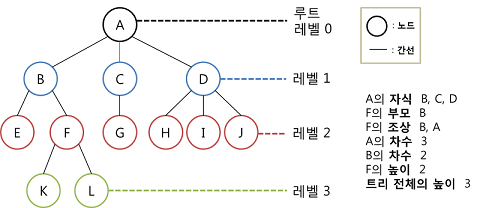

### 5.2 트리의 구현
아래와 같은 트리를 구현해보자.
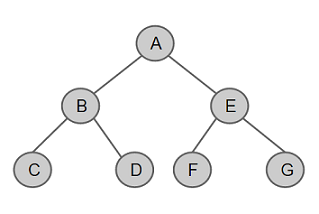

#### 5.2.1 트리의 초기화

In [ ]:
class tNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def init_tree():
    global root
    
    root = tNode("A") # root노드와 자식 노드(B, E) 생성
    node1 = tNode("B")
    node2 = tNode("E")
    root.left = node1;
    root.right = node2;
    
    node = root.left # B노드의 자식 노드(C, D) 생성
    node1 = tNode("C")
    node2 = tNode("D")
    node.left = node1
    node.right = node2
    
    node = root.right # E노드의 자식 노드(F, G) 생성
    node1 = tNode("F")
    node2 = tNode("G")
    node.left = node1
    node.right = node2

init_tree()

### 5.3 트리의 순회
트리의 순회는 <b>전위 순회(Pre-Order), 중위 순회(In-Order), 후위 순회(Post-Order), 단계 순회(Level-Order)</b>로 4가지가 있다.<br>
각 순회의 대한 탐색 순서는 위에서 구현한 트리를 예로 한다.

#### 5.3.1 전위 순회(Pre-Order)
"부모 노드 -> 왼쪽 자식의 노드 -> 오른쪽 자식의 노드" 순으로 방문하면 트리를 탐색한다.<br>
<b>[A - B - C - D - E - F - G]</b>

In [ ]:
def preorder:
    pass

#### 5.3.2 중위 순회(In-Order)
"왼쪽 자식의 노드 -> 부모 노드 -> 오른쪽 자식의 노드" 순으로 방문하며 트리를 탐색한다.<br>
<b>[C - B - D - A - F - E - G]</b>

In [ ]:
def inorder:
    pass

#### 5.3.3 후위 순회(Post-Order)
"왼쪽 자식의 노드 -> 오른쪽 자식의 노드 -> 부모 노드" 순으로 방문하며 트리를 탐색하다.<br>
<b>[C - D - B - F - G - E - A]</b>

In [ ]:
def postorder:
    pass

#### 5.3.4 단계 순회(Level-Order)
각 레벨(level)의 왼쪽에서 오른쪽으로 방문하며 트리를 탐색한다.<br>
<b>[A - B - E - C - D - F - G]</b>

In [ ]:
def levelorder:
    pass

### 5.4 이진 트리(Binary Tree)
각 노드가 가지는 자식의 수가 2개 이하인 트리로 차수가 2 이하인 트리를 의미한다.<br>

## 6. 그래프(graph) (--추가 예정)
    설명